In [1]:
import pickle
from os import listdir, getcwd
from os.path import dirname, abspath, join
import numpy as np

In [13]:
seq_length = 20
is_sequential = True
is_pca = True

In [3]:
def data_to_numpy(data: list) -> np.array:
    arr = np.empty((len(data),len(data[0]), len(data[0][0])), np.float64)
    for i in range(len(data)):
        for j in range(len(data[0])):
            arr[i, j, :] = [data[i][j]['x'], data[i][j]['y'], data[i][j]['z']]
    return arr

def standardize_data(data, axis_, center=True, scale=True):
    shape_ = list(data.shape)
    shape_[axis_] = 1
        
    if center:
        data = data - data.mean(axis=axis_).reshape(*shape_)
    if scale:
        data = data - data.min(axis=axis_).reshape(*shape_)
        data = data / (data.max(axis=axis_) - data.min(axis=axis_)).reshape(*shape_)

    return data

def to_sequential(data: np.ndarray, seq_length: int=10, axis: int=1) -> np.ndarray:
    '''Transforms to sequential data

        # sp_cls[0] = 1 if np.sum(np.abs(s[0, 13] - s[0, 14])) > 0.025 else 0
        # txt = 'speaking' if np.sum(sp_cls)/2 >= 0.5 else 'not speaking'
    Parameters
    ----------
    data: np.ndarray
        The data to be processed
    seq_length: int
        The total number of consequent samples that would be used
        to generate the sequential data
    axis: int
        The nex axis where the sequences would be put in

    Returns
    -------
        np.ndarray
        The transformed sequential data

    '''

    shape_ = tuple(val - seq_length + 1 if i == 0 else val for i, val in enumerate(data.shape))
    shape_ = shape_[:axis] + (seq_length,) + shape_[axis:]
    seq_data = np.zeros(shape_)
    for i in range(data.shape[0]-seq_length+1):
        seq_data[i, :, :, :] = data[i:i+seq_length, :, :]
    return seq_data

In [299]:
data_dir = abspath(dirname(getcwd()))
# for f in listdir(data_dir):
#     if '.pickle' in f:
#         data_path = join(data_dir, f)
with open('experiment_data/not_facing_speaking_2.pickle', 'rb') as fp:
    data = pickle.load(fp)
    data = data_to_numpy(data)

In [5]:
arr_l = []
arr_nl = []
data_dir = join(abspath(getcwd()), 'experiment_data')
for f in listdir(data_dir):
    data_path = join(data_dir, f)
    if 'not' in data_path:
        with open(data_path, 'rb') as fp:
            arr_nl.append(data_to_numpy(pickle.load(fp)))
    else:
        with open(data_path, 'rb') as fp:
            arr_l.append(data_to_numpy(pickle.load(fp)))
# data = data_to_numpy(data)

In [6]:
arr_l = []
arr_nl = []
data_dir = join(abspath(getcwd()), 'experiment_data')
for f in listdir(data_dir):
    data_path = join(data_dir, f)
    if 'speaking' not in data_path:
        with open(data_path, 'rb') as fp:
            arr_nl.append(data_to_numpy(pickle.load(fp)))
    else:
        with open(data_path, 'rb') as fp:
            arr_l.append(data_to_numpy(pickle.load(fp)))

In [7]:
arr_f = np.vstack((arr_l[0], arr_l[1], arr_l[2], arr_l[3]))
arr_nf = np.vstack((arr_nl[0], arr_nl[1], arr_nl[2], arr_nl[3]))


In [304]:
arr_f = to_sequential(arr_f, seq_length=seq_length)
arr_nf = to_sequential(arr_nf, seq_length=seq_length)

In [8]:
X = np.vstack((arr_f, arr_nf))
y = np.hstack((np.ones(arr_f.shape[0]), np.zeros(arr_nf.shape[0])))

In [306]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# with open('models.pkl', 'rb') as fp:
#     clfs = pickle.load(fp)

In [9]:
# X_s = to_sequential(X, seq_length=20)
# print(X_s.shape)
X_s = standardize_data(X, axis_=2)
print(X_s.shape)
X_s = np.copy(X_s.reshape(X_s.shape[0], -1))
print(X_s.shape)
# X_s = clfs['PCA'].transform(X_s)
# print(X_s.shape)


(11738, 478, 3)
(11738, 1434)


In [308]:
# from sklearn.metrics import accuracy_score
# accuracy = {}
# for name, clf in clfs.items():
#     # clfs[name] = clf
#     # clfs[name].fit(X_train, y_train)
#     if name == 'PCA':
#         continue
#     y_pred = clf.predict(X_s)
#     accuracy[name] = accuracy_score(y, y_pred)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_s = pca.fit_transform(X_s)
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.5, random_state=1)

from sklearn import svm
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from time import time
# clf = AdaBoostClassifier(n_estimators=150, random_state=0)
# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#     max_depth=1, random_state=0)
# clf = GaussianNB()
# clf = KNeighborsClassifier(n_neighbors=3)
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

accuracy = {}
infer_time = {}
clfs = {}
train_time = {}

for name, clf in zip(names, classifiers):
    clfs[name] = clf
    now = time()
    clfs[name].fit(X_train, y_train)
    train_time[name] = time() -now
    now = time()
    y_pred = clfs[name].predict(X_test)
    infer_time[name] = (time() - now)/y_pred.shape[0]
    accuracy[name] = accuracy_score(y_test, y_pred)

/home/vision/.cache/pypoetry/virtualenvs/data-extraction-WtZGDk9M-py3.8/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [11]:
accuracy

{'Nearest Neighbors': 0.9001533481001874,
 'Linear SVM': 0.5828931674902028,
 'RBF SVM': 0.8950417447606066,
 'Gaussian Process': 0.9620037485091157,
 'Decision Tree': 0.7975805077525984,
 'Random Forest': 0.7403305503492928,
 'Neural Net': 0.7670812744930994,
 'AdaBoost': 0.8665871528369399,
 'Naive Bayes': 0.6191855512012268,
 'QDA': 0.8389844948032033}

In [311]:
m = max(infer_time.values())

for k, v in infer_time.items():
    print(f'{k}: {v/m}')

Nearest Neighbors: 0.1198858825424417
Linear SVM: 0.1818909229093757
RBF SVM: 1.0
Gaussian Process: 0.5958492512414435
Decision Tree: 0.0002363878930322633
Random Forest: 0.0010286640861777187
Neural Net: 0.001087543338727001
AdaBoost: 0.019627578693540947
Naive Bayes: 0.002522758251027963
QDA: 0.010802657873829674


In [365]:
keep = ["Nearest Neighbors", "SVM", "Gaussian Process", "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
keep_cls = {}
keep_it = {}

for k, v in accuracy.items():
    if k in keep:
        keep_cls[k] = v*100
        keep_it[k] = infer_time[k]*100

In [378]:
keep_it.values()

dict_values([0.0129038818881043, 0.06413405980819312, 2.5443541697966743e-05, 0.00011071995792225895, 0.002112608689528245, 0.0002715363461747129])

In [377]:
import pandas as pd

cmaps = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps2 = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

m = max(keep_it.values())
df = pd.DataFrame(zip(keep_cls.keys(), keep_cls.values(), keep_it.values()), 
                  columns=["Classifier", "Accuracy (%)", "Execution Time (ms)"])
df = df.reset_index(drop=True)
df.style.background_gradient(cmap=cmaps[3], subset="Accuracy (%)").background_gradient(cmap=cmaps[3]+"_r", subset="Execution Time (ms)")

,Classifier,Accuracy (%),Execution Time (ms)
0,Nearest Neighbors,93.880342,0.012904
1,Gaussian Process,98.700855,0.064134
2,Decision Tree,84.735043,0.000025
3,Random Forest,82.290598,0.000111
4,AdaBoost,91.692308,0.002113
5,Naive Bayes,70.820513,0.000272


In [15]:
import mediapipe as mp
from protobuf_to_dict import protobuf_to_dict

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

import cv2
import numpy as np

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
clf = clfs['Gaussian Process']
record_video = False
sp_cls = np.zeros(seq_length)
max_num_faces=1
refine_landmarks=True
min_detection_confidence=0.5
min_tracking_confidence=0.5
with mp_face_mesh.FaceMesh(
        max_num_faces=max_num_faces,
        refine_landmarks=refine_landmarks,
        min_detection_confidence=min_detection_confidence,
        min_tracking_confidence=min_tracking_confidence,
    ) as face_mesh:
    cap = cv2.VideoCapture('vid2.mp4')

    # Check if camera opened successfully
    if (cap.isOpened()== False):
      print("Error opening video stream or file")

    # Read until video is completed
    if record_video:
      frame_width = int(cap.get(3))
      frame_height = int(cap.get(4))
        
      size = (frame_width, frame_height)
      out = cv2.VideoWriter('output_videos/is_looking.mp4', 
                          cv2.VideoWriter_fourcc(*'MJPG'),
                          10, size)
    count = 0
    while(cap.isOpened()):
      # Capture frame-by-frame
      ret, frame = cap.read()
      if ret == True:
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        # image.flags.writeable = False
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)

        # Draw the face mesh annotations on the image.
        # image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                # add facelandmarks to the keypoints listimage
                keypoint = protobuf_to_dict(face_landmarks)["landmark"]
        else:
          continue

        s = np.array([[i['x'], i['y'], i['z']] for i in keypoint])
        s = np.expand_dims(s, axis=0)
        # s = s[:, upper_lip + lower_lip, :]
        # s = s[:, upper_lip, :] - s[:, lower_lip, :]
        # s = standardize_data(s, axis_=1)
        if is_sequential:
          if count == 0:
            seq_frames = s
            count += 1
            continue
          elif count < seq_length - 1:
            seq_frames = np.concatenate((seq_frames, s), axis=0)
            count += 1
            continue
          elif count == seq_length - 1:
            seq_frames = np.concatenate((seq_frames, s), axis=0)
            count += 1
          else:
            seq_frames = np.roll(seq_frames, -1, axis=0)
            seq_frames[seq_length-1] = s
        else:
          inference_frame = s.reshape(1, -1)


        # break
        if is_sequential:
          inference_frame = np.expand_dims(seq_frames, axis=0)
          inference_frame = standardize_data(inference_frame, axis_=2)
          inference_frame = inference_frame.reshape(1, -1)

          # print(inference_frame.shape)
          # break
        else:
          inference_frame = standardize_data(inference_frame, axis_=1)
          inference_frame = inference_frame.reshape(1, -1)

        inference_frame = pca.transform(inference_frame) if is_pca else inference_frame

        y_pred = clf.predict(inference_frame)
        pred_text = "facing" if y_pred == 1 else "not facing"
        # pred_text = "speaking" if y_pred == 1 else "not speaking"
        # print(label_text[int(y_pred)])
        # print(f'diff: {s[]}')
        # sp_cls = np.roll(sp_cls, 1, axis=0)
        # sp_cls[0] = 1 if np.sum(np.abs(s[0, upper_lip] - s[0, lower_lip])) > 0.5 else 0
        # txt = 'speaking' if np.sum(sp_cls)/2 >= 0.5 else 'not speaking'
        # txt = str(np.sum(np.abs(s[0, upper_lip] - s[0, lower_lip])))
        window_name = 'Image'
  
        # font
        font = cv2.FONT_HERSHEY_SIMPLEX
        # org
        org = (50, 50)
          
        # fontScale
        fontScale = 0.5
          
        # Blue color in BGR
        color = (255, 0, 0)
          
        # Line thickness of 2 px
        thickness = 2
          
        # Using cv2.putText() method
        image = cv2.putText(image, pred_text, org, font, fontScale, color, thickness, cv2.LINE_AA)
        # image = cv2.putText(image, txt, org, font, fontScale, color, thickness, cv2.LINE_AA)
        # print(label_text[int(y_pred)])
        # break
        # Display the resulting frame
        if record_video:
          out.write(image)
        cv2.imshow('Frame',image)

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
          break

      # Break the loop
      else: 
        break

    # When everything done, release the video capture object
    cap.release()
    if record_video:
      out.release()

# Closes all the frames
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x56498e76f740) is not the object's thread (0x56498e6e1880).
Cannot move to target thread (0x56498e76f740)

QObject::moveToThread: Current thread (0x56498e76f740) is not the object's thread (0x56498e6e1880).
Cannot move to target thread (0x56498e76f740)

QObject::moveToThread: Current thread (0x56498e76f740) is not the object's thread (0x56498e6e1880).
Cannot move to target thread (0x56498e76f740)

QObject::moveToThread: Current thread (0x56498e76f740) is not the object's thread (0x56498e6e1880).
Cannot move to target thread (0x56498e76f740)

QObject::moveToThread: Current thread (0x56498e76f740) is not the object's thread (0x56498e6e1880).
Cannot move to target thread (0x56498e76f740)

QObject::moveToThread: Current thread (0x56498e76f740) is not the object's thread (0x56498e6e1880).
Cannot move to target thread (0x56498e76f740)

QObject::moveToThread: Current thread (0x56498e76f740) is not the object's thread (0x56498e6e1880).
Cannot move to tar

In [314]:
upper_lip = [185, 184, 183, 191, 
             40, 74, 42, 80,
             39, 73, 41, 81, 
             37, 72, 38, 82, 
             0, 11, 12, 13, 
             267, 302, 208, 312,
             269, 303, 271, 311,
             270, 304, 272, 310,
             409, 408, 407, 415]

lower_lip = [146, 77, 96, 95,
             91, 90, 89, 88,
             181, 180, 179, 178,
             84, 85, 86, 87,
             17, 16, 15, 14,
             314, 315, 316, 317,
             405, 404, 403, 402,
             321, 320, 319, 318,
             375, 307, 325, 324]

In [315]:
arr_f.shape

(5925, 20, 478, 3)

In [316]:
import cv2
import numpy as np
from time import time
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
# ft = cv2.freetype.createFreeType2()
# ft.loadFontData(fontFileName='fonts/JetBrainsMono-Medium.ttf',id=0)
# record_video = False
# seq_length = 30
# weight_func = 'logspace'

def speaking_analysis(data, weight_func='logspace', theta=0.008, seq_length=30):
  weight_val = Noneeep = ["Nearest Neighbors", "SVM", "Gaussian Process", "Decision Tree", "Random Forest", "AdaBoost", "Naive Bayes"]
keep_cls = {}
keep_it = {}

for k, v in accuracy.items():
    if k in keep:
        keep_cls[k] = v
        keep_it[k] = infer_time[k]
  if weight_func == 'logspace':
    weight_val = np.logspace(0.1, 1, num=seq_length, base=2.0)/np.sum(np.logspace(0.1, 10, num=seq_length, base=2.0))
  elif weight_func == 'linear':
      weight_val = np.arange(1, seq_length+1)/np.sum(np.arange(1, seq_length + 1))
  else:
    weight_val = np.ones(seq_length)/np.sum(seq_length)

  confidence_weight = np.arange(1, seq_length+1)/np.sum(np.arange(1, seq_length + 1))
  sp_cls = np.zeros(seq_length)
  # max_num_faces=1
  # refine_landmarks=True
  # min_detection_confidence=0.5
  # min_tracking_confidence=0.5
  conf_analysis = {
    'speaking': {
      'count': 0,
      'conf': []
    },
      'not_speaking': {
      'count': 0,
      'conf': []
    }
  }
  flag = True
  et = 0
  for s in data:
    if flag:
      now = time()
    s = np.expand_dims(s, axis=0)
    sp_cls = np.roll(sp_cls, -1, axis=0)
    lip_distance = np.abs(s[0, upper_lip, 1] - s[0, lower_lip, 1])
    lip_distance = lip_distance/(lip_distance.max() - lip_distance.min())
    sp_cls[seq_length - 1] = 1 if np.sum(lip_distance) > 5 else 0
    # decision_val = np.sum(sp_cls * weight_val)
    # decision_val = 'speaking' if np.sum(sp_cls * weight_val) >= 0.0003 and sp_cls[-seq_length//2:].sum() == seq_length//2 else 'not speaking'
    decision_val = 'speaking' if np.sum(sp_cls * weight_val) >= theta else 'not speaking' # better result
    if flag:
      et = time() - now
      flag = False
    # print(sp_cls)
    diff = np.sum(np.abs(s[0, upper_lip, 1] - s[0, lower_lip, 1]))
    confidence = np.sum(sp_cls * confidence_weight)
    
    if decision_val == 'speaking':
      conf_analysis['speaking']['count'] += 1
      conf_analysis['speaking']['conf'].append(confidence)
    else:
      conf_analysis['not_speaking']['count'] += 1
      conf_analysis['not_speaking']['conf'].append(confidence)
  
  return conf_analysis, et
  

In [317]:
sp = np.array(conf_analysis['speaking']['conf'])
nsp = np.array(conf_analysis['not_speaking']['conf'])
print(sp.shape)
print(nsp.shape)

NameError: name 'conf_analysis' is not defined

In [ ]:
from rich.progress import Progress

method = ['logspace']
num = ((0.010 - 0.005) // 0.0001) + 1
theta_vals = np.linspace(start=0.001, stop=0.010, num=int(num))
seq_lengths = [i for i in range(5, 195, 5)]
res = {}

res["speak_accuracy"] = np.zeros((len(method), len(seq_lengths), theta_vals.shape[0]))
res["non_speak_accuracy"] = np.zeros((len(method), len(seq_lengths), theta_vals.shape[0]))
res["tp"] = np.zeros((len(method), len(seq_lengths), theta_vals.shape[0]))
res["fp"] = np.zeros((len(method), len(seq_lengths), theta_vals.shape[0]))
res["tn"] = np.zeros((len(method), len(seq_lengths), theta_vals.shape[0]))
res["fn"] = np.zeros((len(method), len(seq_lengths), theta_vals.shape[0]))
# res["et"] = np.zeros((len(method), len(seq_lengths), theta_vals.shape[0]))
et = np.zeros(len(seq_lengths))
d = res['speak_accuracy'].size
# for n in track(range(res['speak_accuracy'].size), description="Processing..."):
# for n in track(range(res['speak_accuracy'].size), description="[green]Processing..."):
# with Progress() as progress:
#     task1 = progress.add_task("[green]Processing...", total=res['speak_accuracy'].size)
    # av = 1/res['speak_accuracy'].size
n = 0
for i, m in enumerate(method):
    for j, sl in enumerate(seq_lengths):
        flag = True
        for k, v in enumerate(theta_vals):
            conf, et[j] = speaking_analysis(arr_f, m, v, sl)
            sp = np.array(conf['speaking']['conf'])
            nsp = np.array(conf['not_speaking']['conf'])
            # print(f'For {m}: speaking -> {sp.shape}, not speaking -> {nsp.shape}')
            res["tp"][i,j,k] = sp.shape[0]
            res["fn"][i,j,k] = nsp.shape[0]
            res['speak_accuracy'][i, j, k] = sp.shape[0]/(sp.shape[0] + nsp.shape[0])

            conf, _ = speaking_analysis(arr_nf, m, v, sl)
            sp = np.array(conf['speaking']['conf'])
            nsp = np.array(conf['not_speaking']['conf'])
            res["tn"][i,j,k] = nsp.shape[0]
            res["fp"][i,j,k] = sp.shape[0]
            # print(f'For {m}: speaking -> {sp.shape}, not speaking -> {nsp.shape}')
            res['non_speak_accuracy'][i, j, k] = nsp.shape[0]/(sp.shape[0] + nsp.shape[0])
            # do_work(n)
            # while not progress.finished:
            # progress.update(task1)
            ending = '\n' if n == d else '\r'            
            n+=1
            print(f'Progress: {n/d*100:.3f}%', end=ending)



In [ ]:
with open("speak_data_logspace_all.pickle", 'wb') as f:
    pickle.dump([res, et], f)

In [ ]:

with open("speak_data_log.pickle", 'rb') as f:
    l_res = pickle.load(f)

In [ ]:
# tp = l_res['tp']
# fp = l_res['fp']
# tn = l_res['tn']
# fn = l_res['fn']
# 38 = seq_length -> sl
# 50 = theta_vals -> tv
l_res = res
tp = l_res['tp'][2]
fp = l_res['fp'][2]
tn = l_res['tn'][2]
fn = l_res['fn'][2]
fn.shape

tp_tv = np.mean(tp, axis=0)
fp_tv = np.mean(fp, axis=0)
tn_tv = np.mean(tn, axis=0)
fn_tv = np.mean(fn, axis=0)

tp_sl = np.mean(tp, axis=1)
fp_sl = np.mean(fp, axis=1)
tn_sl = np.mean(tn, axis=1)
fn_sl = np.mean(fn, axis=1)

precision_tv = tp_tv / (tp_tv + fp_tv)
recall_tv = tp_tv / (tp_tv + fn_tv)
accuracy_tv = (tp_tv + tn_tv) / (tp_tv + tn_tv + fp_tv + fn_tv)
# accuracy_tv.argmax() # 28
# accuracy_sl.argmax() # 42

# l_res['speak_accuracy'][2, 28, 42] # 0.97
# l_res['non_speak_accuracy'][2, 28, 42] # 0.79
# seq_lengths[28] # 145
# theta_vals[42] # 0.0087

/tmp/ipykernel_31703/3876761319.py:24: RuntimeWarning: invalid value encountered in true_divide
  precision_tv = tp_tv / (tp_tv + fp_tv)


0.008714285714285716

In [ ]:
# res['non_speak_accuracy'].shape
tp.shape

(38, 50)

In [ ]:
accuracy_sl = (tp_sl + tn_sl) / (tp_sl + tn_sl + fp_sl + fn_sl)
res['non_speak_accuracy'][2].max(axis=0)
accuracy_sl.argmax()
res['non_speak_accuracy'][2, 28, 42]
res['speak_accuracy'][2, 28, 42]

0.979306864064603

In [ ]:
precision_sl = tp_sl / (tp_sl + fp_sl)
recall_sl = tp_sl / (tp_sl + fn_sl)
accuracy_sl = (tp_sl + tn_sl) / (tp_sl + tn_sl + fp_sl + fn_sl)
accuracy_sl.max()

0.7197648662463794

In [ ]:
l_res['speak_accuracy'][2].mean(axis=1).shape# l_res['non_speak_accuracy'][2].max()

(38,)

37
45


0.8797031411805316

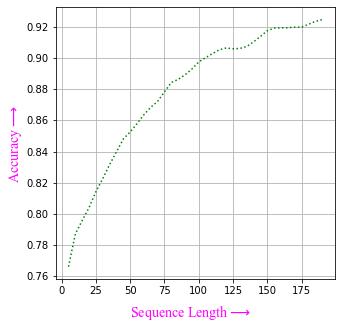

In [ ]:
l_res['speak_accuracy'].shape
l_res = res
csfont = {'fontname':'Times New Roman'}

accuracy_accross_theta_values = np.max((l_res['speak_accuracy'] + l_res['non_speak_accuracy']) / 2, axis=1) 
accuracy_accross_seq_length = np.max((l_res['speak_accuracy'] + l_res['non_speak_accuracy']) / 2, axis=2) 
print(accuracy_accross_seq_length[2].argmax())
print(accuracy_accross_theta_values[2].argmax())

fig, ax = plt.subplots(nrows=1, figsize=(5, 5))
# major_ticks = np.arange(0, 101, 20)
# minor_ticks = np.arange(0, 101, 5)
ax.plot(seq_lengths, accuracy_accross_seq_length[2], 'g:')
ax.grid()
fig.text(0.5, 0.02, f'Sequence Length$\longrightarrow$', ha='center', **csfont, size=14, color='magenta')
fig.text(-0.01, 0.5, 'Accuracy$\longrightarrow$', va='center', rotation='vertical', **csfont, size=14, color='magenta')
# ax.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)
# # ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
# ax.grid(which='both')

# Or if you want different settings for the grids:
# ax.grid(which='minor', alpha=0.2)
# ax.grid(which='major', alpha=0.5)

# axes[1].plot(theta_vals, accuracy_accross_theta_values[2], 'r--')
# axes[1].grid()

# fig, axes = plt.subplots(nrows=2, figsize=(5, 5))
# axes[2].plot(np.arange(len(seq_lengths)), b[0], 'g:')
# axes[2].plot(np.arange(len(theta_vals)), a[0], 'r--')
# plt.show()

# theta_vals.shape
# accuracy_accross_theta_values.shape
# a.shape
# l_res['speak_accuracy'][2, 37, 45]
l_res['non_speak_accuracy'][2, 37, 45]

37
45
0.009265306122448979
0.9248784884906696


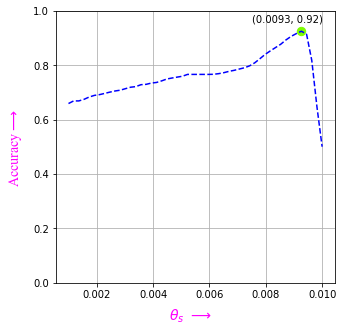

In [ ]:
l_res['speak_accuracy'].shape
l_res = res
csfont = {'fontname':'Times New Roman'}

accuracy_accross_theta_values = np.max((l_res['speak_accuracy'] + l_res['non_speak_accuracy']) / 2, axis=1) 
accuracy_accross_seq_length = np.max((l_res['speak_accuracy'] + l_res['non_speak_accuracy']) / 2, axis=2) 
print(accuracy_accross_seq_length[2].argmax())
print(accuracy_accross_theta_values[2].argmax())

fig, ax = plt.subplots(nrows=1, figsize=(5, 5))
# major_ticks = np.arange(0, 101, 20)
# minor_ticks = np.arange(0, 101, 5)
ax.plot(theta_vals, accuracy_accross_theta_values[2], 'b--')
ax.scatter(0.009265306122448979, 0.9248784884906696, color='lawngreen', s=70)
ax.annotate("(0.0093, 0.92)", (0.0075, 0.96))
ax.set_ylim([0, 1.0])

ax.grid()
fig.text(0.5, 0.02, f'$\\theta_s~\longrightarrow$', ha='center', **csfont, size=14, color='magenta')
fig.text(-0.01, 0.5, 'Accuracy$\longrightarrow$', va='center', rotation='vertical', **csfont, size=14, color='magenta')

l_res['non_speak_accuracy'][2, 37, 45]
print(theta_vals[accuracy_accross_theta_values[2].argmax()])
print(accuracy_accross_theta_values[2].max())

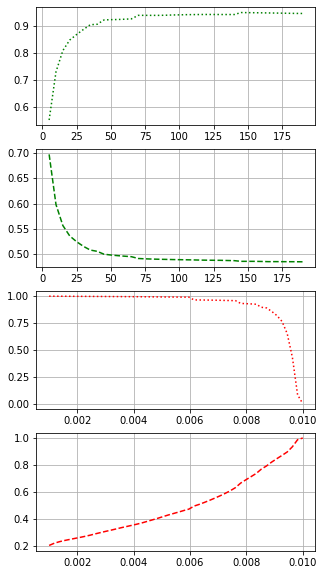

In [ ]:
accuracy_accross_theta_values_sp =  l_res['speak_accuracy'][2].mean(axis=0) 
accuracy_accross_seq_length_sp = l_res['speak_accuracy'][2].mean(axis=1) 
accuracy_accross_theta_values_nsp = l_res['non_speak_accuracy'][2].mean(axis=0) 
accuracy_accross_seq_length_nsp = l_res['non_speak_accuracy'][2].mean(axis=1) 

fig, axes = plt.subplots(nrows=4, figsize=(5, 10))

axes[0].plot(seq_lengths, accuracy_accross_seq_length_sp, 'g:')
axes[0].grid()
axes[1].plot(seq_lengths, accuracy_accross_seq_length_nsp, 'g--')
axes[1].grid()

axes[2].plot(theta_vals, accuracy_accross_theta_values_sp, 'r:')
axes[2].grid()
axes[3].plot(theta_vals, accuracy_accross_theta_values_nsp, 'r--')
axes[3].grid()

plt.show()


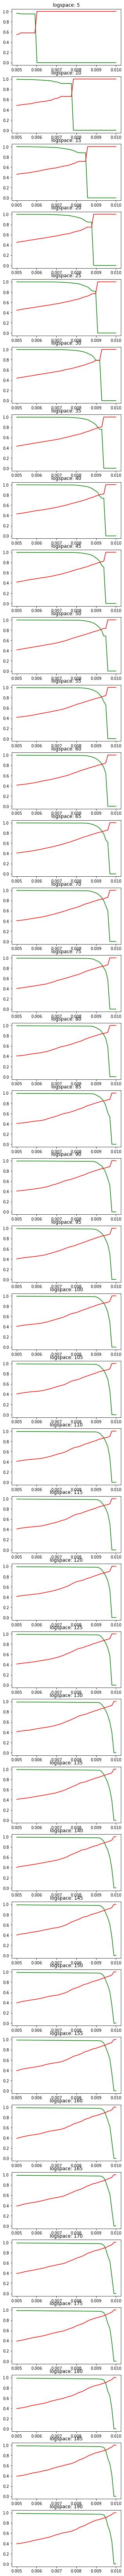

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(3,180), dpi=80)

# fig = plt.figure()
fig, axes = plt.subplots(nrows=len(seq_lengths), ncols=len(method), figsize=(5, 120))

for i in range(len(seq_lengths)):
    for j in range(len(method)):
        axes[i].plot(theta_vals, res['speak_accuracy'][j, i], 'g')
        axes[i].plot(theta_vals, res['non_speak_accuracy'][j, i], 'r')
        axes[i].set_title(f'{method[j]}: {seq_lengths[i]}')



plt.show()


__Horizontal field of view HFOV=70.42º__

__0.75__
True Positive = 1725

False Negative = 18

False Positive =  45

True Negative = 1684


__1.50__
True Positive = 1719

False Negative = 17

False Positive =                           ;726 facing 2

True Negative =                            ;791
 